In [10]:
#check the conda environment

import os

current_env = os.environ.get('CONDA_DEFAULT_ENV', None)

if current_env is not None:
    print(f"Currently active Conda environment: {current_env}")
else:
    print("No Conda environment is currently active.")


Currently active Conda environment: /Users/barbara.talkington/Documents/GitHub/innerworkings/.conda


In [16]:
#install packages manually because it wasn't working through import
!conda install -y matplotlib

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::prompt-toolkit==3.0.39=pyha770c72_0
  - conda-forge/noarch::typing-extensions==4.7.1=hd8ed1ab_0
  - conda-forge/noarch::exceptiongroup==1.1.3=pyhd8ed1ab_0
  - conda-forge/noarch::platformdirs==3.10.0=pyhd8ed1ab_0
  - conda-forge/noarch::jedi==0.19.0=pyhd8ed1ab_0
  - conda-forge/noarch::six==1.16.0=pyh6c4a22f_0
  - conda-forge/noarch::pure_eval==0.2.2=pyhd8ed1ab_0
  - conda-forge/noarch::pygments==2.16.1=pyhd8ed1ab_0
  - conda-forge/noarch::traitlets==5.10.0=pyhd8ed1ab_0
  - defaults/osx-64::certifi==2023.7.22=py311hecd8cb5_0
  - conda-forge/noarch::packaging==23.1=pyhd8ed1ab_0
  - conda-forge/noarch::ipython==8.15.0=pyh31c8845_0
  - defaults/noarch::charset-normalizer==2.0.4=pyhd3eb1b0_0
  - defaults/osx-64::brotlipy==0.7.0=py311h6c40b1e_1002
  - conda-forge/noarch::backcall==0.2.0=pyh9f0ad1d_0
  - conda-forge/no

In [2]:
#make sure that we're in the correct conda 
!which conda


/Users/barbara.talkington/opt/anaconda3/condabin/conda


In [ ]:
#import packages
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl


In [ ]:
#importing more packages
import pandas as pd


In [9]:
#install geopandas can use terminal or simply run in python notesbook
conda install -c conda-forge geopandas


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.4



## Package Plan ##

  environment location: /Users/barbara.talkington/Documents/GitHub/innerworkings/.conda

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blosc-1.21.5               |       heccf04b_0          49 KB  conda-forge
    boost-cpp-1.78.0           |       h2f2b2fd_4        14.6 MB  conda-forge
    branca-0.6.0               |     pyhd8ed1ab_0          27 KB  conda-forge
    c-ares-1.19.1              |       h0dc2134_0         101 KB  conda-forge
    cfitsio-4.3.0              |       h66f91ea_0         824 KB  conda-forge


In [12]:
#Check Library Versions: In a code cell within your notebook, you can check the versions of Pandas and Geopandas to ensure they are correctly installed:
import pandas as pd
import geopandas as gpd

print("Pandas version:", pd.__version__)
print("Geopandas version:", gpd.__version__)


Pandas version: 2.1.0
Geopandas version: 0.14.0


In [14]:
#importing more packages
import geopandas as gpd


In [1]:
#manual installation because `census` and `us` was not working
!pip install census
!pip install us


 `shift+command+P` >Restart Kernal

In [3]:
#install more packages after manual install
from census import Census
from us import states


In [4]:
#install more packages
import os

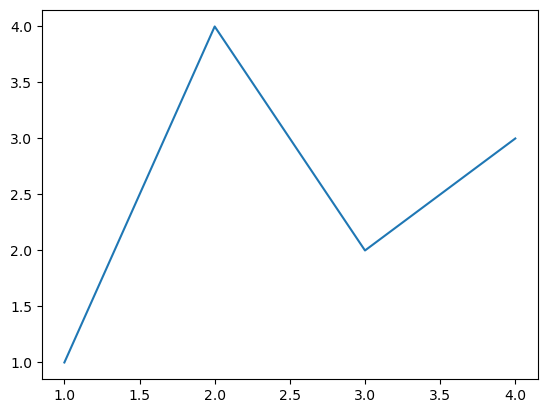

In [5]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

In [5]:
# Set API key
c = Census("021bbdbf2ae1e31ae98e2398f3d67dc18cc96900")

In [10]:
# Obtain Census variables from the 2019 ACS at the tract level for the Commonwealth of Virginia (FIPS code: 51)
# C17002_001E: count of ratio of income to poverty in the past 12 months (total)
# C17002_002E: count of ratio of income to poverty in the past 12 months (< 0.50)
# C17002_003E: count of ratio of income to poverty in the past 12 months (0.50 - 0.99)
# B01003_001E: total population
# Sources: https://api.census.gov/data/2019/acs/acs5/variables.html; https://pypi.org/project/census/
wa_census = c.acs5.state_county_tract(fields = ('NAME', 'C17002_001E', 'C17002_002E', 'C17002_003E', 'B01003_001E'),
                                      state_fips = states.WA.fips,
                                      county_fips = "*",
                                      tract = "*",
                                      year = 2017)

In [13]:
# Create a dataframe from the census data
wa_df = pd.DataFrame(wa_census)

# Show the dataframe
print(wa_df.head(2))
print('Shape: ', wa_df.shape)

                                             NAME  C17002_001E  C17002_002E  \
0     Census Tract 926, Kitsap County, Washington       6153.0        450.0   
1  Census Tract 801.02, Kitsap County, Washington       5033.0        399.0   

   C17002_003E  B01003_001E state county   tract  
0        302.0       6256.0    53    035  092600  
1        220.0       5156.0    53    035  080102  
Shape:  (1458, 8)
